In [1]:
# ライブラリのimport
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel

# 前処理
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train["AG_ratio"].fillna(train["Alb"] / (train["TP"] - train["Alb"]), inplace=True)
train.drop_duplicates(inplace=True)
train.reset_index(drop=True, inplace=True)


train["Gender"] = train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
X = train.drop(["disease"], axis=1)
y = train["disease"]
X_target = X.drop(["Gender"], axis=1)

# 多項式・交互作用特徴量
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial_arr = polynomial.fit_transform(X_target)
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 組み込み法のモデル、閾値の指定
fs_model = LogisticRegression(penalty='l1', random_state=0)
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量選択の実行
selector.fit(X_polynomial, y)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

# 学習用・評価用データの分割（元の説明変数Xの代わりに、特徴量選択後のX_polynomial_maskedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_polynomial_masked, y, test_size=0.3, random_state=0)

# モデルの学習・予測
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:, 1]


# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)




y_pred_fin = model.predict(test)
yfin = y_pred_fin
print(yfin)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 640x480 with 1 Axes>

AUC: 0.8254861536747088


ValueError: could not convert string to float: 'Female'

In [13]:
# ライブラリのimport
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel

# 前処理
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train["AG_ratio"].fillna(train["Alb"] / (train["TP"] - train["Alb"]), inplace=True)
test['AG_ratio'].fillna(test['Alb']/(test['TP']-test['Alb']),inplace=True)
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True,inplace=True)

train["Gender"] = train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
test['Gender'] = test['Gender'].apply(lambda y: 1 if y=='Male' else 0)

X_train = train.drop(['disease'],axis=1)
y_train = train['disease']

X_test = test
y_test = test['disease']

lr = LogesticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print(y_pred)

KeyError: "['disease'] not found in axis"

In [16]:
sam = pd.read_csv('sample_submit.csv')
sam

,891,0
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
376,1268,0
377,1269,0
378,1270,1
379,1271,1


In [15]:
# ライブラリのimport
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(891, 12) (382, 11)


In [6]:
train.describe()

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,887.000000,891.000000
mean,445.000000,43.340067,2.807856,1.256790,268.607071,63.770146,81.336139,6.537823,3.230752,0.997858,0.483726
std,257.353842,16.647096,4.922115,2.578286,226.134887,154.295258,175.539331,1.030673,0.748239,0.302247,0.500016
min,0.000000,3.000000,0.400000,0.100000,63.000000,9.900000,10.100000,2.600000,0.900000,0.310000,0.000000
25%,222.500000,31.000000,0.800000,0.200000,170.450000,21.900000,22.900000,5.900000,2.700000,0.810000,0.000000
50%,445.000000,44.000000,1.100000,0.400000,198.000000,30.000000,35.000000,6.600000,3.200000,0.990000,0.000000
75%,667.500000,57.000000,2.100000,0.900000,279.000000,51.400000,68.000000,7.300000,3.800000,1.165000,1.000000
max,890.000000,90.000000,43.200000,19.800000,2110.100000,2000.200000,2946.000000,9.600000,5.600000,2.970000,1.000000


In [7]:
test.describe()

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1081.500000,42.942408,2.842408,1.075654,251.396073,71.764660,87.207592,6.490576,3.230890,1.006885
std,110.418145,16.371245,7.029998,2.282263,169.904503,180.246444,222.277722,1.040904,0.818352,0.307500
min,891.000000,7.000000,0.200000,0.100000,91.900000,9.800000,12.000000,3.500000,0.900000,0.100000
25%,986.250000,30.000000,0.800000,0.200000,171.175000,21.900000,23.100000,5.900000,2.625000,0.810000
50%,1081.500000,42.000000,1.100000,0.300000,194.900000,31.050000,35.050000,6.500000,3.250000,1.000000
75%,1176.750000,55.000000,1.900000,0.800000,275.775000,52.000000,61.725000,7.200000,3.800000,1.190000
max,1272.000000,84.000000,75.300000,19.800000,1580.000000,1999.900000,2946.000000,9.600000,5.600000,2.380000


In [40]:
train.shape

(2037, 13)

In [19]:
train["AG_ratio"].fillna(train["Alb"] / (train["TP"] - train["Alb"]), inplace=True)
train.drop_duplicates(inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
id          891 non-null int64
Age         891 non-null int64
Gender      891 non-null object
T_Bil       891 non-null float64
D_Bil       891 non-null float64
ALP         891 non-null float64
ALT_GPT     891 non-null float64
AST_GOT     891 non-null float64
TP          891 non-null float64
Alb         891 non-null float64
AG_ratio    891 non-null float64
disease     891 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 90.5+ KB


In [10]:
train.isnull().sum()

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    4
disease     0
dtype: int64

In [6]:
train.corr()

,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
id,1.000000,0.049873,0.005274,0.002191,0.004649,-0.008899,-0.013150,-0.051528,-0.050070,-0.045367,0.009745
Age,0.049873,1.000000,0.023838,0.022956,0.043923,-0.068371,-0.043663,-0.211715,-0.261470,-0.128418,0.144898
T_Bil,0.005274,0.023838,1.000000,0.992112,0.256488,0.256965,0.355203,-0.014836,-0.230144,-0.253245,0.373955
D_Bil,0.002191,0.022956,0.992112,1.000000,0.254928,0.236076,0.328497,-0.014602,-0.224510,-0.244583,0.366597
ALP,0.004649,0.043923,0.256488,0.254928,1.000000,0.096297,0.116894,-0.023761,-0.154299,-0.191594,0.274803
ALT_GPT,-0.008899,-0.068371,0.256965,0.236076,0.096297,1.000000,0.866955,-0.005689,-0.010086,-0.003151,0.218902
AST_GOT,-0.013150,-0.043663,0.355203,0.328497,0.116894,0.866955,1.000000,-0.007298,-0.068083,-0.063927,0.259385
TP,-0.051528,-0.211715,-0.014836,-0.014602,-0.023761,-0.005689,-0.007298,1.000000,0.782394,0.154946,-0.016355
Alb,-0.050070,-0.261470,-0.230144,-0.224510,-0.154299,-0.010086,-0.068083,0.782394,1.000000,0.641819,-0.187262
AG_ratio,-0.045367,-0.128418,-0.253245,-0.244583,-0.191594,-0.003151,-0.063927,0.154946,0.641819,1.000000,-0.251914


In [7]:
pd.get_dummies(train).corrwith(train['disease'])

id               0.009745
Age              0.144898
T_Bil            0.373955
D_Bil            0.366597
ALP              0.274803
ALT_GPT          0.218902
AST_GOT          0.259385
TP              -0.016355
Alb             -0.187262
AG_ratio        -0.251914
disease          1.000000
Gender_Female   -0.032606
Gender_Male      0.032606
dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
id          891 non-null int64
Age         891 non-null int64
Gender      891 non-null object
T_Bil       891 non-null float64
D_Bil       891 non-null float64
ALP         891 non-null float64
ALT_GPT     891 non-null float64
AST_GOT     891 non-null float64
TP          891 non-null float64
Alb         891 non-null float64
AG_ratio    887 non-null float64
disease     891 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 83.7+ KB


In [21]:
data = pd.concat([train,test])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 381
Data columns (total 12 columns):
AG_ratio    1273 non-null float64
ALP         1273 non-null float64
ALT_GPT     1273 non-null float64
AST_GOT     1273 non-null float64
Age         1273 non-null int64
Alb         1273 non-null float64
D_Bil       1273 non-null float64
Gender      1273 non-null object
TP          1273 non-null float64
T_Bil       1273 non-null float64
disease     891 non-null float64
id          1273 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 129.3+ KB


In [153]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [154]:
data = pd.concat([train,test])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [155]:
data = data.drop(['id'],axis=1)
data

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,Gender,TP,T_Bil,disease
0,1.01,170.9,42.1,37.1,60,2.9,1.3,Male,5.5,2.9,1.0
1,1.36,158.8,26.0,23.9,28,3.7,0.1,Female,6.4,0.7,0.0
2,0.96,962.0,53.0,40.9,60,3.3,12.5,Male,6.8,23.1,1.0
3,1.31,415.9,33.9,39.0,20,3.8,0.5,Male,7.0,1.0,0.0
4,1.04,152.9,40.9,42.0,44,2.1,0.3,Female,4.5,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
377,1.18,243.1,50.1,101.0,37,3.8,0.4,Male,7.1,1.0,NaN
378,1.29,179.1,20.0,57.1,46,3.4,0.2,Male,6.5,0.8,NaN
379,1.67,326.1,28.8,17.1,47,5.6,0.3,Male,8.7,0.8,NaN
380,1.05,165.1,27.0,29.0,42,4.4,0.1,Female,8.5,0.9,NaN


In [156]:
data["AG_ratio"].fillna(data["Alb"] / (data["TP"] - data["Alb"]), inplace=True)

In [157]:
data.isnull().sum()

AG_ratio      0
ALP           0
ALT_GPT       0
AST_GOT       0
Age           0
Alb           0
D_Bil         0
Gender        0
TP            0
T_Bil         0
disease     382
dtype: int64

In [158]:
data = pd.get_dummies(data)

In [159]:
#学習用と評価用のデータに戻す
train = data.iloc[train.index]
test = data.iloc[test.index]
test = test.drop(['disease'],axis=1)

In [160]:
train

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,TP,T_Bil,disease,Gender_Female,Gender_Male
0,1.01,170.9,42.1,37.1,60,2.9,1.3,5.5,2.9,1.0,0,1
1,1.36,158.8,26.0,23.9,28,3.7,0.1,6.4,0.7,0.0,1,0
2,0.96,962.0,53.0,40.9,60,3.3,12.5,6.8,23.1,1.0,0,1
3,1.31,415.9,33.9,39.0,20,3.8,0.5,7.0,1.0,0.0,0,1
4,1.04,152.9,40.9,42.0,44,2.1,0.3,4.5,0.6,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.07,164.2,30.0,29.0,31,3.0,0.3,6.2,0.7,0.0,0,1
887,1.28,130.1,23.9,25.0,57,4.1,0.3,6.9,1.0,1.0,1,0
888,0.84,574.0,43.1,47.0,54,3.4,12.7,7.2,23.5,1.0,1,0
889,0.87,130.0,23.2,42.0,24,3.9,0.4,8.1,1.2,1.0,0,1


In [161]:
y = train['disease']
X = train.drop(['disease'],axis=1)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model = LogisticRegression()

In [164]:
model.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
pred = model.predict_proba(test)[:,1]
print(pred[:5])

IndexError: too many indices for array

In [178]:
pred = model.predict_proba(test)[:,1]

In [180]:
pred.shape

(382,)

In [184]:
sam = pd.read_csv('sample_submit.csv',header=None)

In [185]:
sam.shape

(382, 2)

In [186]:
sam[1] = pred
sam.to_csv('submit.csv', header=None,index=None)

In [211]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sam = pd.read_csv('sample_submit.csv',header=None)


data = pd.concat([train,test])

data["AG_ratio"].fillna(data["Alb"] / (data["TP"] - data["Alb"]), inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [212]:
data["Gender"] = data["Gender"].apply(lambda x: 1 if x=="Male" else 0)
data = data.drop(['id'],axis=1)

train = data.iloc[train.index]
test = data.iloc[test.index]
test = test.drop(['disease'],axis=1)



In [214]:
y = train['disease']
X = train.drop(['disease'],axis=1)
X_target = X.drop(['Gender'],axis=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


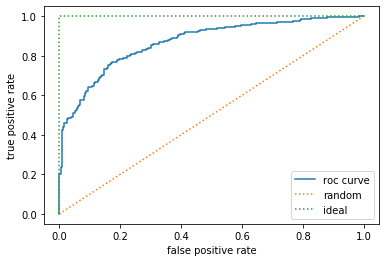

ValueError: Found input variables with inconsistent numbers of samples: [268, 891]

In [220]:
'''
# 多項式・交互作用特徴量
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial_arr = polynomial.fit_transform(X_target)
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 組み込み法のモデル、閾値の指定
fs_model = LogisticRegression(penalty='l1', random_state=0)
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量選択の実行
selector.fit(X_polynomial, y)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

# 学習用・評価用データの分割（元の説明変数Xの代わりに、特徴量選択後のX_polynomial_maskedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_polynomial_masked, y, test_size=0.3, random_state=0)

# モデルの学習・予測
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:, 1]
'''

model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict_proba(X)[:,1]


# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)

In [217]:
X_test

,poly0,poly5,poly6,poly7,poly8,poly9,poly14,poly15,poly17,poly45,poly47,poly52
495,1.085714,3.8,0.3,7.3,0.8,1.178776,4.125714,0.325714,0.868571,1.14,3.04,5.84
648,1.384615,3.6,0.2,6.2,0.8,1.917160,4.984615,0.276923,1.107692,0.72,2.88,4.96
278,1.166667,2.8,0.3,5.2,1.3,1.361111,3.266667,0.350000,1.516667,0.84,3.64,6.76
31,0.513514,1.9,4.6,5.6,8.3,0.263696,0.975676,2.362162,4.262162,8.74,15.77,46.48
255,1.080000,3.0,0.1,5.8,0.9,1.166400,3.240000,0.108000,0.972000,0.30,2.70,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.240000,3.8,1.7,6.9,4.2,1.537600,4.712000,2.108000,5.208000,6.46,15.96,28.98
718,0.740000,3.2,3.1,6.2,7.0,0.547600,2.368000,2.294000,5.180000,9.92,22.40,43.40
620,0.830000,3.0,1.5,6.7,2.2,0.688900,2.490000,1.245000,1.826000,4.50,6.60,14.74
786,1.210000,3.5,0.3,6.5,0.8,1.464100,4.235000,0.363000,0.968000,1.05,2.80,5.20


In [218]:
test

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,Gender,TP,T_Bil
0,1.01,170.9,42.1,37.1,60,2.9,1.3,1,5.5,2.9
1,1.36,158.8,26.0,23.9,28,3.7,0.1,0,6.4,0.7
2,0.96,962.0,53.0,40.9,60,3.3,12.5,1,6.8,23.1
3,1.31,415.9,33.9,39.0,20,3.8,0.5,1,7.0,1.0
4,1.04,152.9,40.9,42.0,44,2.1,0.3,0,4.5,0.6
...,...,...,...,...,...,...,...,...,...,...
377,1.41,145.9,42.0,70.2,69,4.8,0.2,0,8.3,0.8
378,0.81,160.2,20.0,22.0,28,3.1,0.3,1,6.2,1.1
379,0.77,188.1,28.0,43.0,38,3.3,0.2,1,8.1,0.9
380,1.29,177.2,23.0,22.9,51,3.9,0.2,1,6.6,0.7
